# Double Peak structure in $f_\mathrm{S0}$ ?
Irene found that the (or rather some?) weights have double-peak structure?
Why?


In [1]:
from coffea.nanoevents import NanoEventsFactory
from matplotlib import pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)
import numpy as np
import awkward as ak

fname='root://eoscms.cern.ch///eos/cms/store/group/phys_higgs/cmshmm/amarini/aQGC_WPHADWMLEPjj_EWK_LO_NPle1_TuneCP5_13TeV-madgraph-pythia8/UL2018-NANOAODSIMv9/220111_170339/0000/step7_23.root'

events = NanoEventsFactory.from_root(fname).events()

In [7]:
selection = (ak.num(events.GenJetAK8)>0)
fs30p00 = events[selection]['fs0']['30p00']
origXWGTUP = events[selection].LHEWeight.originalXWGTUP
genjetpt = events.GenJetAK8[selection][:,0].pt

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f9fc6bd8350>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f9fc6bd7450>, text=[])

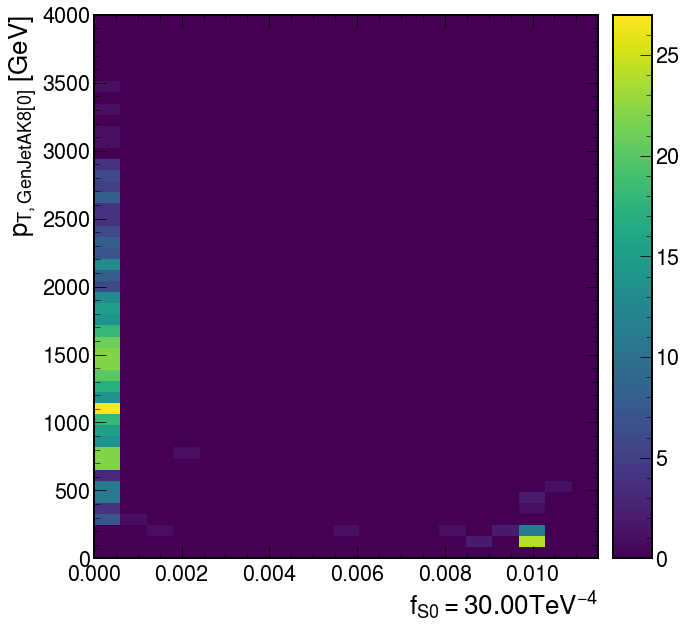

In [34]:
f,ax = plt.subplots()

vmap = np.histogram2d(fs30p00,genjetpt,[np.linspace(0,0.0115,20),np.linspace(0,4000,50)])
ax.set_xlabel("$f_\mathrm{S0} = 30.00 \mathrm{TeV}^{-4}$")
ax.set_ylabel("$p_{T, \mathrm{GenJetAK8[0]}}$ [GeV]")
hep.hist2dplot(vmap,ax=ax)

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f9fc7085c90>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f9fc8937a90>, text=[])

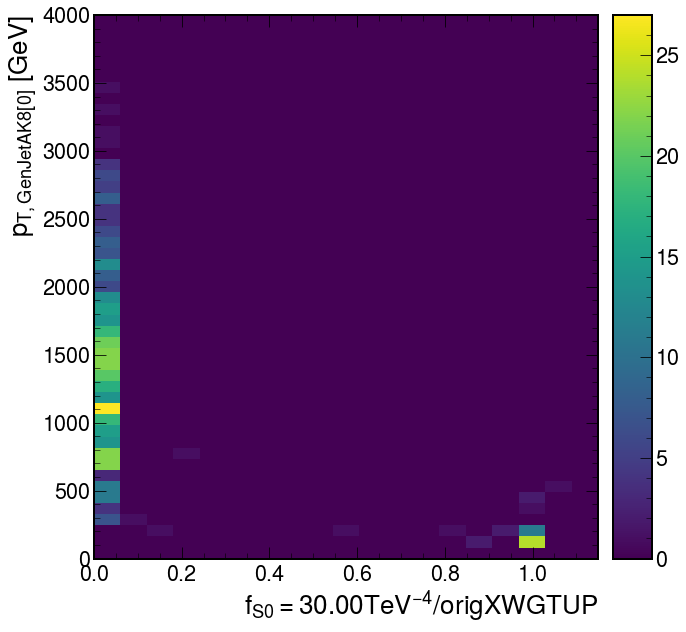

In [36]:
f,ax = plt.subplots()

vmap = np.histogram2d(fs30p00/origXWGTUP,genjetpt,[np.linspace(0,1.15,20),np.linspace(0,4000,50)])
ax.set_xlabel("$f_\mathrm{S0} = 30.00 \mathrm{TeV}^{-4}/origXWGTUP$")
ax.set_ylabel("$p_{T, \mathrm{GenJetAK8[0]}}$ [GeV]")
hep.hist2dplot(vmap,ax=ax)

(-0.1, 1.2)

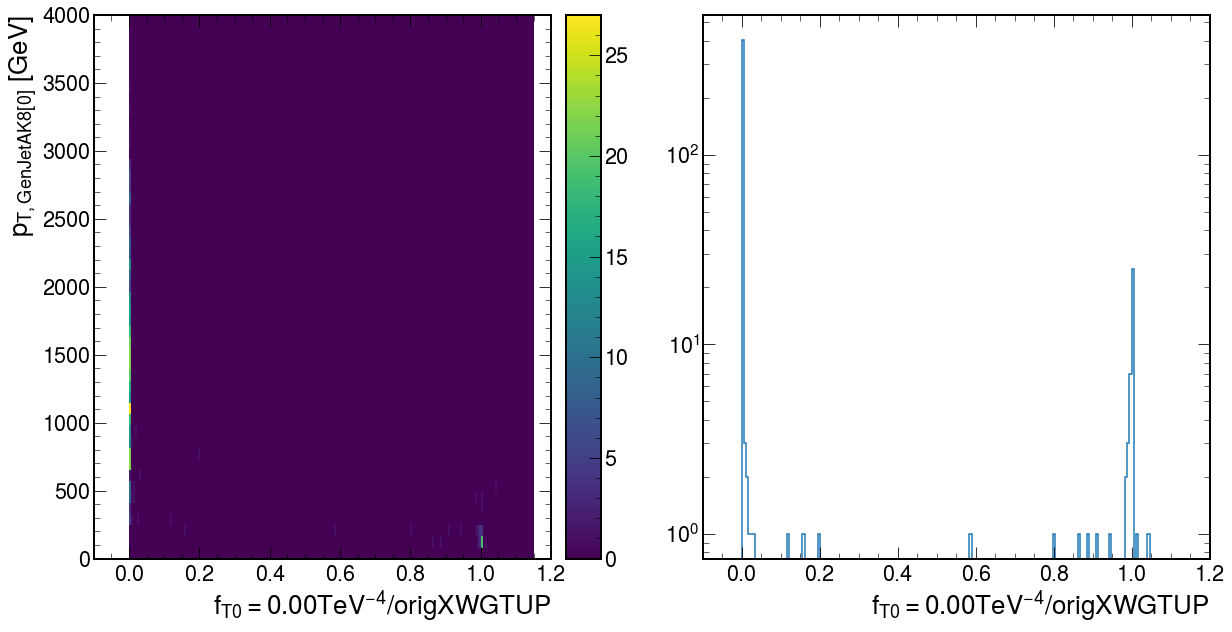

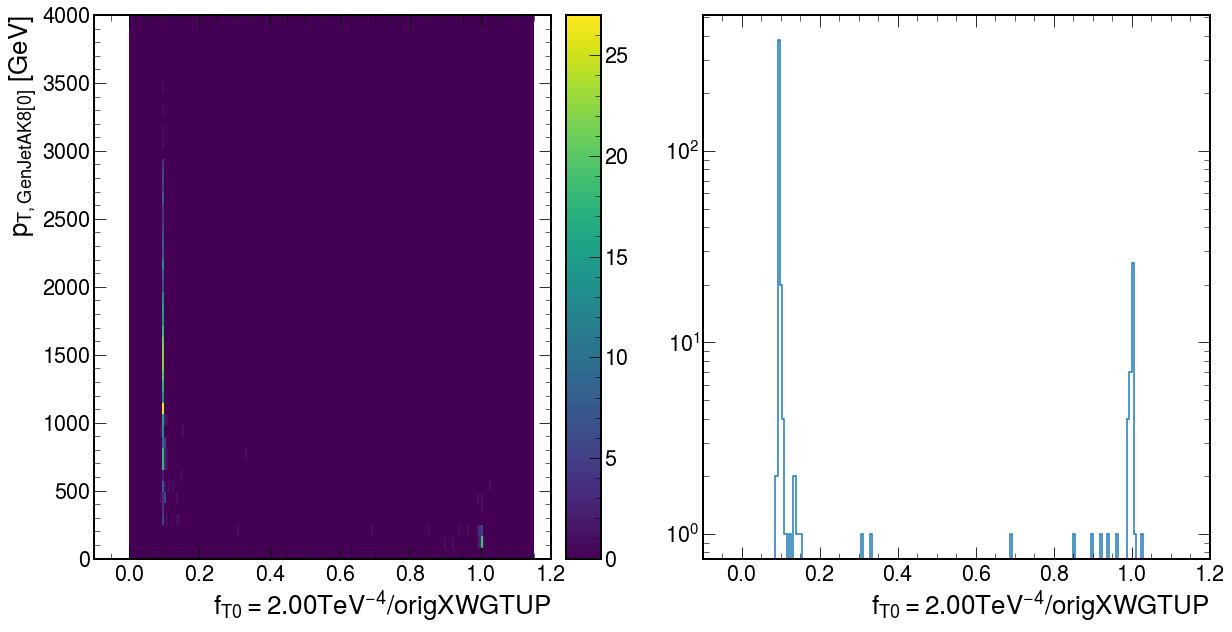

In [70]:
op_weight = events[selection]['ft0']['0p00']

f,ax = plt.subplots(1,2,figsize=(20,10))

vmap = np.histogram2d(events.genWeight[selection]*op_weight/origXWGTUP,genjetpt,[np.linspace(0,1.15,200),np.linspace(0,4000,50)])
ax[0].set_xlabel("$f_\mathrm{T0} = 0.00 \mathrm{TeV}^{-4}/origXWGTUP$")
ax[0].set_ylabel("$p_{T, \mathrm{GenJetAK8[0]}}$ [GeV]")
hep.hist2dplot(vmap,ax=ax[0])
hep.histplot(np.histogram(events.genWeight[selection]*op_weight/origXWGTUP,np.linspace(0,1.15,200)),ax=ax[1])
ax[1].set_xlabel("$f_\mathrm{T0} = 0.00 \mathrm{TeV}^{-4}/origXWGTUP$")
ax[1].set_yscale('log')
ax[1].set_xlim(-0.1,1.2)
ax[0].set_xlim(-0.1,1.2)


op_weight = events[selection]['ft0']['2p00']
f,ax = plt.subplots(1,2,figsize=(20,10))

vmap = np.histogram2d(events.genWeight[selection]*op_weight/origXWGTUP,genjetpt,[np.linspace(0,1.15,200),np.linspace(0,4000,50)])
ax[0].set_xlabel("$f_\mathrm{T0} = 2.00 \mathrm{TeV}^{-4}/origXWGTUP$")
ax[0].set_ylabel("$p_{T, \mathrm{GenJetAK8[0]}}$ [GeV]")
hep.hist2dplot(vmap,ax=ax[0])
hep.histplot(np.histogram(events.genWeight[selection]*op_weight/origXWGTUP,np.linspace(0,1.15,200)),ax=ax[1])
ax[1].set_xlabel("$f_\mathrm{T0} = 2.00 \mathrm{TeV}^{-4}/origXWGTUP$")
ax[1].set_yscale('log')
ax[1].set_xlim(-0.1,1.2)
ax[0].set_xlim(-0.1,1.2)


# Why is the minimum of means not at SM-point?

0.09677927151283792
-0.1
1.5049544799015693e-06
0.0


Text(1, 0, 'fT3 [TeV$^{-4}$] ')

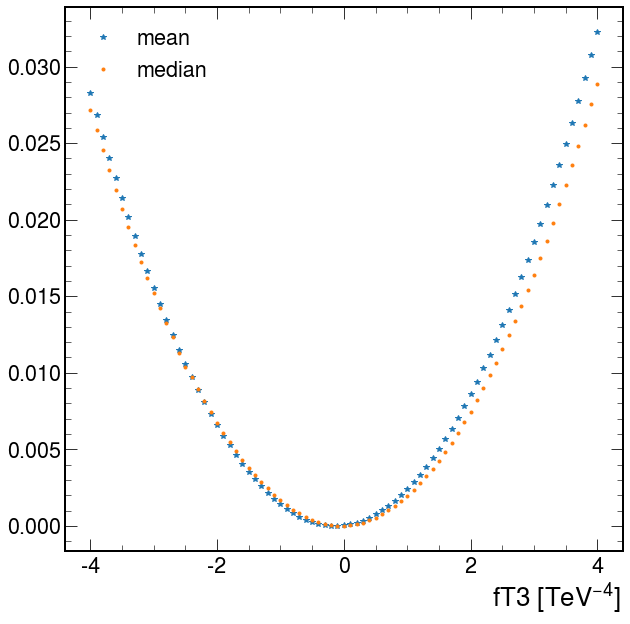

In [81]:
parameter_keys = events[selection]['ft3'].fields
points = []
means = []
medians = []
for parameter_point in parameter_keys:
    point = float(parameter_point.replace("p",'.').replace("m","-"))
    points.append(point)
    weights = events[selection]['ft3'][parameter_point]/events[selection].LHEWeight.originalXWGTUP
    means.append(ak.mean(weights))
    
    medians.append(np.median(weights))
    
f,ax = plt.subplots()
ax.plot(np.array(points),np.array(means)-min(means),"*",label='mean')
print(np.min(means))
print(points[np.argmin(means)])
ax.plot(np.array(points),np.array(medians)-min(medians),".",label='median')
print(np.min(medians))
print(points[np.argmin(medians)])
ax.legend()
ax.set_xlabel("fT3 [TeV$^{-4}$] ")
#ax.set_xlim(-1,1)
#ax.set_ylim(-0.001,0.005)